In [ ]:
#Day 10 -Visuals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("loan_clean_dataset.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,hard_invalid_flag,soft_anomaly_flag,validation_reason
0,DSL4O0KAWD,64,73743,140354,300,0,2,4.12,12,0.24,...,Self-employed,Single,Yes,No,Education,Yes,0,0,1,Loan Amount Exceeds Income;
1,S5IDRA0LCA,22,46351,151652,300,0,4,10.04,36,0.51,...,Part-time,Single,No,Yes,Other,Yes,0,0,1,Loan Amount Exceeds Income;
2,4X63ZOH9Y4,56,42359,163692,300,0,3,4.98,60,0.71,...,Part-time,Divorced,No,Yes,Education,No,0,0,1,High DTI;Loan Amount Exceeds Income;
3,7QM3SGA1AU,23,52705,218580,300,0,3,22.31,60,0.54,...,Unemployed,Divorced,No,Yes,Business,Yes,0,0,1,Loan Amount Exceeds Income;
4,CDH9OTQ8H6,58,131487,15557,301,0,4,21.35,36,0.38,...,Part-time,Divorced,No,No,Other,Yes,0,0,0,NaN


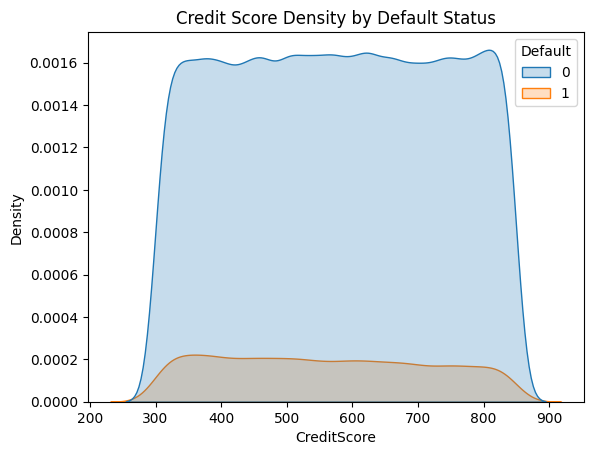

In [2]:
#Credit Score vs Default
sns.kdeplot(data=df, x="CreditScore", hue="Default", fill=True)
plt.title("Credit Score Density by Default Status")
plt.show()

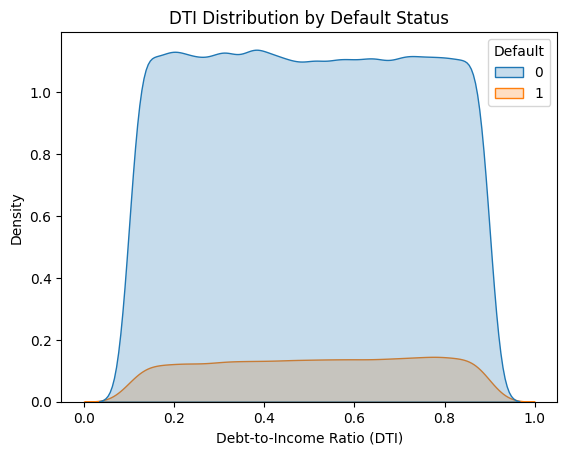

In [3]:
#DTIRatio vs Default
sns.kdeplot(data=df, x="DTIRatio", hue="Default", fill=True)
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.title("DTI Distribution by Default Status")
plt.show()

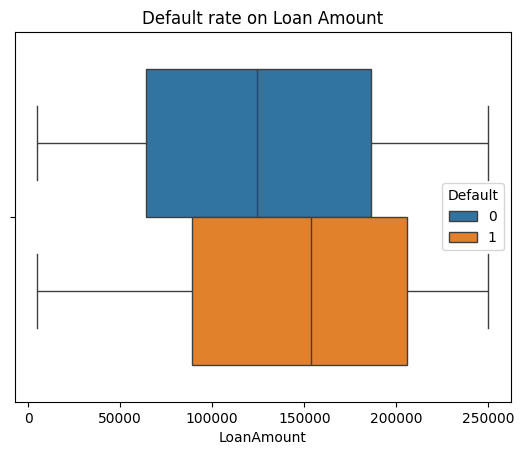

In [4]:
#Loan Amount vs Default
sns.boxplot(data=df,x="LoanAmount",hue="Default")
plt.title("Default rate on Loan Amount")
plt.show()

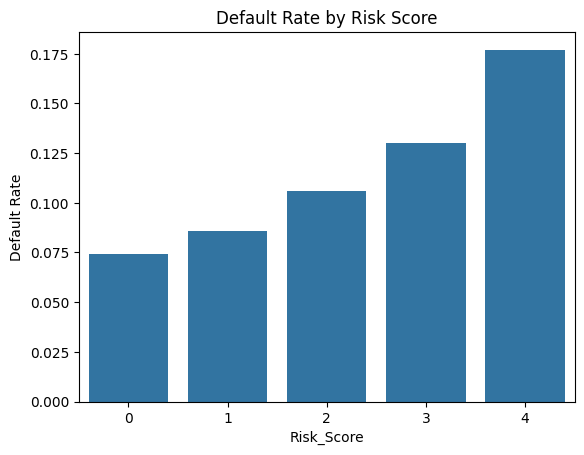

In [5]:
#Risk Score vs Default
df["high_DTI_flag"] = (df["DTIRatio"]>= 0.5).astype(int)
df["low_credit_flag"] = (df["CreditScore"]<600).astype(int)
df["emp_risk_flag"] = df["EmploymentType"].isin(
    ["Unemployed", "Part-time", "Self-employed"]
).astype(int)
df["short_tenure_flag"] = (df["MonthsEmployed"]<24).astype(int)
df["Risk_Score"]= df["high_DTI_flag"]+df["low_credit_flag"]+df["emp_risk_flag"]+df["short_tenure_flag"]

risk_default_rate = df.groupby("Risk_Score")["Default"].mean().reset_index()

sns.barplot(
    data=risk_default_rate,
    x="Risk_Score",
    y="Default"
)

plt.ylabel("Default Rate")
plt.title("Default Rate by Risk Score")
plt.show()


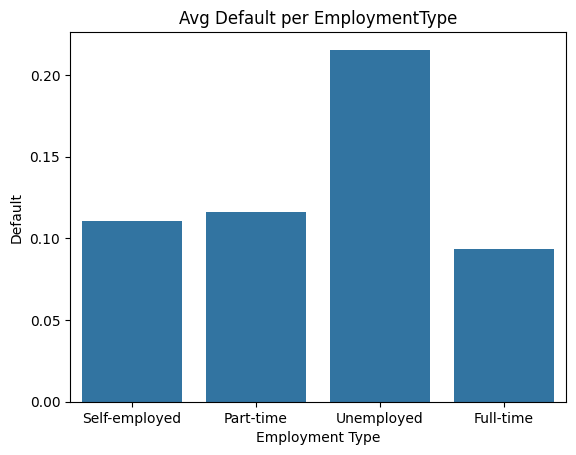

In [ ]:
#Employment type vs Default
df["MeanDefault"] = df.groupby("EmploymentType")["Default"].transform("mean")
# df["MeanDefault"]
sns.barplot(data= df, x= "EmploymentType", y="MeanDefault")
plt.xlabel("Employment Type")
plt.ylabel("Default")
plt.title("Avg Default per EmploymentType")
plt.show()